# **The Problem of Gaze Estimation**

---

## **Introduction**

Eye gaze is a **fundamental aspect** of non-verbal communication, providing rich information about an individual's intent and attention.

**Gaze estimation** is an area in computer vision that aims to determine the direction in which a person is looking—often simplified to a single point of gaze—by analyzing visual data.

This problem can be broadly categorized into **3D** and **2D gaze estimation**, each with its unique methodologies and applications.


---

## **3D and 2D Gaze Estimation**

### 3D Gaze Estimation

3D gaze estimation is often concerned with deriving a **vectorial representation** of the gaze direction, represented through XYZ coordinates. This approach provides flexibility in handling multiple object interactions and depth variations, which are significant factors in a three-dimensional context.

Traditional methods often require intricate setups involving **infrared cameras** or **specialized glasses**.



### 2D Gaze Estimation

In contrast, **2D gaze estimation** identifies the gaze point on a two-dimensional plane, often a computer screen. Depth is generally less critical in 2D models, and it is commonly assumed that the gaze intersects directly with the plane.

While 3D methods offer a wide range of applications, our focus will be on **2D gaze estimation**. This choice is motivated by its lower hardware requirements, often only necessitating a standard webcam, and its crucial role in human-computer interaction, making it highly relevant for everyday computing environments.


---

## **Applications of Gaze Estimation**

The utility of gaze estimation spans across multiple domains.

- In **human-computer interaction**, it can greatly enhance the user's experience by facilitating a hands-free interface and improving accessibility for those with mobility impairments.
  
- In the **automotive sector**, real-time gaze information can provide critical insights into a driver's level of attention, thereby improving safety measures.

- In the **medical field**, gaze estimation can be a game-changer for both diagnostic and operational procedures. Medical professionals could control complex machinery and access vital patient information through gaze-controlled interfaces, thereby maintaining a sterile environment during surgeries.

- Marketers can also employ this technology to **analyze consumer behavior** and optimize product placement and advertising strategies.

## **Challenges in Accurate Gaze Estimation**

Accurate gaze estimation is a complex task that involves a multitude of factors. Below are some of the key challenges:

#### 1. **Head's Location and Movements**
The position and orientation of the head can significantly affect the gaze direction. For instance, users often shift their seating positions during a computer session. A gaze that corresponds to a specific screen location when the user is seated directly in front of the computer may not correlate to the same location if the user shifts to the side. Therefore, the model must be resilient to such positional changes to maintain accuracy.

#### 2. **Variations in Lighting Conditions**
Users often operate their computers in a wide range of lighting conditions, from bright daylight to dim rooms. These variations can affect the visibility of the eyes and the performance of the model if it hasn't been trained to be invariant to lighting conditions.

#### 3. **Eye Registration Errors**
In the course of normal computer usage, it is reasonable to expect some level of eye registration errors. While minimizing these errors is crucial, completely eliminating them is often not feasible. Therefore, a robust gaze estimation model should be designed to account for occasional inaccuracies in eye registration, which could otherwise lead to erroneous output.

#### 4. **Individual User Biases**
Each individual may have unique characteristics that can introduce biases into the gaze estimation. These can range from the shape and size of the eyes to wearing glasses and even to the user's sitting position and background environment. Models need to be robust enough to handle these individual differences to ensure accurate gaze estimation.

By addressing these challenges, we can move closer to developing a more accurate and reliable gaze estimation solution.




---




## **Datasets in Gaze Estimation**

Data is the backbone of any machine learning model, and gaze estimation is no exception. Several types of datasets are commonly used in this field, ranging from **synthetic datasets** generated through computer graphics to **real-world datasets** collected from eye-tracking experiments and volunteers. Some datasets focus solely on **2D gaze points**, while others offer **3D gaze vectors** along with additional information like head pose or eye region.

Early datasets like **CAVE** focused on constrained lab environments with static head positions, offering limited variability but high control. In contrast, newer datasets have moved toward more unconstrained settings. **Gaze360** and **ETH-XGaze** are examples of this trend, offering data collected from multiple subjects in both indoor and outdoor scenarios, and with high variability in position—some images even include full-body representation.

### The Search for the Ideal Dataset

In my search for a suitable dataset for our task, several factors came into play. The first consideration was the diversity of the data, including variations in lighting, head pose, and multiple subjects. The second was the volume of the dataset, as more data generally leads to better model generalization. Finally, hardware limitations and compatibility with everyday webcams were also crucial factors.


---


### Introduction to MPIIFaceGaze and MPIIGaze

After careful consideration, I concluded that the dataset meeting all these criteria and being particularly popular for this task was **MPIIFaceGaze**. This dataset is derived from its predecessor, **MPIIGaze**.

#### **MPIIGaze**

**MPIIGaze** is a dataset comprising over 200,000 images collected from 15 participants. The data was gathered over a span of three months during the participants' routine laptop usage. The collection methodology was straightforward yet effective. A software application, running in the background on the participants' laptops, prompted them every 10 minutes to focus on a sequence of 20 randomly positioned on-screen dots. Participants were instructed to fixate on these dots and confirm their gaze by pressing the spacebar just as each circle was about to disappear.

Subsequent to the data collection, the images underwent a meticulous annotation process. The eye regions in the images were isolated, converted to grayscale, and normalized to facilitate subsequent analysis.


#### **MPIIFaceGaze**

The **MPIIFaceGaze** dataset was curated by Zhang et al. with the hypothesis that gaze can be more accurately predicted when the entire face is considered. Thus, **MPIIFaceGaze** indeed showed better results in numerous papers and studies, becoming one of the most used datasets in the field. MPIIFaceGaze is, in essence, the same original images which were captured in MPIIGaze, but instead of the preprocessing that was done there, it takes a different approach of leaving the face compleltly visable and only blackening the background around the head instead of just cropping the eye region as was done in MPIIGaze, in addition the dataset includes annotations of numerous facial features, and the removal of noisy data where the eye region wasnt completly visable. This means that a large part of the data cleaning was already done for us, leaving us with just minor preprocessing before the dataset is ready for use.

Of course like with everything the **MPIIFaceGaze** datasets comes with its own tradeoff, specificaly arising from the need to hand monitor and annotate the facial feature, which in turn reduced the dataset size to 37,000 images across all participants. Despite that I want to argue that the quality achieved in this dataset outweights the additional images that we lost from the original **MPIIGaze**.

In the following figure we can further see why **MPIIFaceGaze** was chosen:

<img src="https://drive.google.com/uc?export=view&id=1de8hykUZn87uGy2ztBs2SnWYrNZfnYc4" alt="Image" style="display: block; margin: auto;"/>



Among commonly used datasets that allow for unconstrained head movement, our choice of dataset offers superior image quality. This high-quality data is advantageous for our model, enabling it to focus on relevant features rather than background noise.

###  **A Closer Look at MPIIFaceGaze**

To provide a more comprehensive understanding of the **MPIIFaceGaze** dataset, let's examine some sample images.

#### Variability in Lighting and Accessories
The following images, taken directly from the MPIIFaceGaze dataset, illustrate the diversity in the range of participants, capturing variations not only in lighting conditions and glasses, but also in demographic attributes such as gender and ethnicity. This diversity enhances the robustness of the dataset, making it more representative of real-world conditions.

<img src="https://drive.google.com/uc?export=view&id=11Z4tb2M78zuQjZK6IDtdlMr2MlmLA66V" alt="Image" style="display: block; margin: auto;"/>


#### Image Processing
It's worth noting that the images in the actual dataset have undergone a specific form of processing for privacy reasons. Rather than normalizing the images to a uniform size, the dataset employs a method where the background surrounding the participants' faces is blackened. This leaves only the facial features exposed, effectively anonymizing the environment in which the photo was taken.

The resulting dataset appears as follows:
<img src="https://drive.google.com/uc?export=view&id=1sPXFaNIfA5Xv_eJ5gzqJtF8w1ljJg4TN" alt="Image" style="display: block; margin: auto;"/>

An additional benefit of blackening the background is the mitigation of background bias. By removing the contextual environment, the dataset ensures that the models trained on it focus solely on the facial features for gaze estimation, rather than being influenced by the background. This is particularly important for creating a model that generalizes well across diverse settings. Moreover, the original position of the face within the frame is preserved despite the background blackening. This is crucial for addressing one of the challenges we outlined earlier: the variability in facial positions. The negative space created by the blackened background serves as a valuable metric for assessing the relative position of the face, thereby providing another layer of information that can be leveraged for more accurate gaze estimation.


---




## **Exploratory Data Analysis (EDA)**
In this section, we delve into the intricacies of the selected dataset to better understand its structure, distribution, and potential utility for our gaze estimation model.

### **Distribution Across Participants**

To begin, let's examine how the dataset is distributed among the various participants.


<img src="https://drive.google.com/uc?export=view&id=162dH_bm-fwtvlHjuaYJFwIoorvHetU-h" alt="Image" style="display: block; margin: auto;"/>


The histogram illustrates a fairly balanced distribution of data across participants, ranging from approximately 1,500 to 3,000 images per individual. This balanced distribution is advantageous for several reasons:

1. **Diverse Representation**: The dataset includes participants of varying genders, races, and complexions. This diversity is crucial for the model's ability to generalize across different demographic groups.
  
2. **Robustness to Individual Peculiarities**: A balanced dataset minimizes the risk of the model learning features that are unique to specific individuals, thereby enhancing its generalizability.

By ensuring a balanced and diverse dataset, we lay a strong foundation for building a gaze estimation model that is both robust and widely applicable.


### **Mean Greyscale Intensity**

Next, let's examine the mean greyscale intensity across the dataset. Understanding this metric is crucial as it provides insights into the variability of lighting conditions within the dataset—a factor that significantly impacts the model's ability to generalize.


<img src="https://drive.google.com/uc?export=view&id=1Ot7-M1_JuKrs2e2sJXIAlfYfvAMNFuWF" alt="Image" style="display: block; margin: auto;"/>

The histogram reveals a distribution that is approximately normal, indicating a wide range of lighting conditions. This is particularly beneficial for addressing one of the challenges we discussed earlier: the model's robustness to varying lighting conditions. A dataset that captures a broad spectrum of lighting scenarios lays the groundwork for a more versatile and reliable gaze estimation model.


### **Facial Positioning in the Dataset**

One of the challenges previously outlined was the model's sensitivity to variations in **facial positioning**. To mitigate this issue, it is crucial that our dataset encompasses a diverse range of facial positions. However, this diversity should be within logical bounds based on typical use-cases for **2D gaze estimation**. Generally, we assume that users sit fairly centered in front of the screen and that the screen height falls within a reasonable range, affecting the **Y-axis positioning** of the face. If these assumptions are not met, the model's **gaze prediction accuracy** could be compromised.

To evaluate the diversity in facial positioning within our dataset, we plotted the **centers of mass** for all the images in a scatter plot.


<img src="https://drive.google.com/uc?export=view&id=1vFXgjgDHNfXmhD_xK2aVAFlgUt3D-AGN" alt="Image" style="display: block; margin: auto;"/>


The scatter plot reveals that the dataset contains an adequate variation in facial positioning across both axes. Importantly, the data points are generally centered, aligning well with our assumptions about **typical computer usage**. This centered distribution is desirable, as an overly broad spread across the entire image range would not accurately reflect **average computer use**.





### **Distribution of Gaze Points**

Another crucial aspect to examine is the **distribution of gaze points** captured in our dataset. Ideally, we would prefer a uniform distribution within the relevant range. However, before delving into this, it is important to address a factor we have thus far overlooked: the **variation in screen sizes**.

We can anticipate that users will employ screens with diverse sizes and resolutions. Failing to account for this would severely limit our model's ability to **generalize across different devices**. To simplify this issue, we have decided to standardize on the most common screen resolution for modern single-screen setups, which is **1920x1080**. Fortunately, the MPIIFaceGaze dataset provides the screen sizes of the participants, allowing us to transform the given coordinates into our assumed range.

After applying this filtering, we obtain the following graph:

<img src="https://drive.google.com/uc?export=view&id=1a1CSzhl5QLcuD1dVX1GDDPpi-AcvqWwf" alt="Image" style="display: block; margin: auto;"/>

As evident from the graph, all coordinates are well-represented in our dataset, suggesting a **robust distribution of training data** for our model. To further investigate this, let's examine the distribution within the range:

<img src="https://drive.google.com/uc?export=view&id=1VPnLz9SQvpddKiVBA_-U5QpZOMBfWPEE" alt="Image" style="display: block; margin: auto;"/>

The distribution effectively captures the **expected gaze locations**. As anticipated, the edges of the screen experience less gaze activity compared to the center. The transition between these areas is smooth, aligning perfectly with what we would desire from our dataset.




---



## **The Naive Approach**

Armed with an in-depth understanding of our dataset and a clearly defined problem statement, we are now prepared to venture into the realm of gaze prediction.

### **Pipeline Overview**
Our overarching goal is to develop a pipeline that takes a facial image—captured in real-time via a webcam—as input, applies the necessary preprocessing steps, and then feeds it into a regression-based model. The output from this model will be a pair of coordinates \(x, y\), representing the gaze point on the screen.

### **Initial Strategy**
We will commence with a naive approach, which involves using the facial images in their original form. These images will be fed into a Convolutional Neural Network (CNN) equipped with a linear regression head to predict the gaze coordinates. Given that this is our first attempt at solving this problem, we do not anticipate achieving high accuracy right away. However, we do aim to establish that the problem is "learnable." In other words, we seek to confirm that standard webcam images of faces contain sufficient information to predict gaze points, and that there is a meaningful correlation between the appearance of the eyes and the screen coordinates.

### **Implementation Steps**
1. **Data Preparation and Loading**: Our first task is to prepare and load the dataset.
2. **Test-Train Split**: We will partition the dataset into a smaller test set and a training set.
3. **Model Definition**: A simple CNN model will be defined for this initial experiment.
4. **Model Training**: We will proceed to train the model using the training set.
5. **Evaluation**: Finally, we will assess the model's performance on the test set to gauge the accuracy achieved.

By following this approach, we aim to lay the groundwork for more sophisticated models and techniques in subsequent iterations.




---


We shall start by loading the dataset,  accessible for download [here.](https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/research/gaze-based-human-computer-interaction/its-written-all-over-your-face-full-face-appearance-based-gaze-estimation)


In [1]:
# Import necessary libraries
from google.colab import drive
import os
from scipy.io import loadmat
import pickle

import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F

import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Navigate to the folder where your dataset is stored
%cd /content/drive/MyDrive/DataSets

# Uncomment the following line if the dataset needs to be unzipped for the first time
# Subsequent runs should not require unzipping.
#!unzip "MPIIFaceGaze.zip"

Mounted at /content/drive
/content/drive/MyDrive/DataSets


Due to the substantial size of the dataset, it is impractical to load the entire dataset into memory. Therefore, our initial step will involve storing the file paths of the images along with their corresponding labels in a list. This approach allows for efficient memory management while facilitating easy access to the data during subsequent stages of the project.

In [3]:
# The root directory where the dataset resides
root_directory = '/content/drive/MyDrive/DataSets/MPIIFaceGaze'

# List for image paths and their gaze coordinates
image_data = []

# Generate a list of participant ids
participant_ids = [f"p{str(index).zfill(2)}" for index in range(15)]

# Iterate over each participant's folder to gather image paths and gaze coordinates
for participant_id in participant_ids:
  # Construct the paths for the participant's directory, annotation file, and calibration data
  participant_directory = os.path.join(root_directory, participant_id)
  annotation_filepath = os.path.join(participant_directory, f"{participant_id}.txt")
  calibration_filepath = os.path.join(participant_directory, 'Calibration', 'screenSize.mat')

  # Load the screen size calibration data
  calibration_data = loadmat(calibration_filepath)
  screen_height, screen_width = int(calibration_data['height_pixel']), int(calibration_data['width_pixel'])

  # Read the annotation file and extract relevant data
  with open(annotation_filepath, 'r') as annotation_file:
    for line in annotation_file:
      # Parse each line to extract relevant fields
      fields = line.strip().split()
      image_filepath = os.path.join(participant_directory, fields[0])

      # Normalize the screen resolution
      normalized_x = int(fields[1]) * 1920 / screen_width
      normalized_y = int(fields[2]) * 1080 / screen_height

      # Append the image filepath and normalized coordinates to the list
      image_data.append((image_filepath, (normalized_x, normalized_y)))

print(f"Total number of images gathered: {len(image_data)}")

Total number of images gathered: 37667


We can see that we started with **37,667** images.
Next, we'll sift through this data to weed out any outliers, inconsistent images, and labels that don't quite add up.

In [7]:
def filter_image(img_data):
  img_path, (x_coord, y_coord) = img_data
  # Check that the coordinates add up
  if x_coord > 1920 or y_coord > 1080:
    return None
  image = cv2.imread(img_path)

  # Check if the image exists in the dataset
  if image is None:
    return None
  # Check that the image shape lines up with the rest of the dataset
  if image.shape[:2] != (720, 1280):
    return None
  return (img_path, (x_coord, y_coord))

# Define the name of the file where the filtered_images list will be saved
pickle_file = "/content/drive/MyDrive/DataSets/WS/filtered_images.pkl"  # Change the path as needed

# Initialize an empty list to store filtered image data
filtered_images = []

# Check if the pickle file already exists
if os.path.exists(pickle_file):
  # Load the filtered_images list from the pickle file
  with open(pickle_file, 'rb') as f:
    filtered_images = pickle.load(f)
  print(f"Loaded {len(filtered_images)} filtered images from {pickle_file}")
else:
  # No file was found
  print("No saved file was found")
  # Loop through the list of images to filter them
  for img_data in tqdm(image_data):
    filtered_img = filter_image(img_data)
    if filtered_img is not None:
      filtered_images.append(filtered_img)

  # Save the filtered_images list to a pickle file
  with open(pickle_file, 'wb') as f:
    pickle.dump(filtered_images, f)

  print(f"Saved {len(filtered_images)} filtered images to {pickle_file}")




Loaded 37416 filtered images from /content/drive/MyDrive/DataSets/WS/filtered_images.pkl


After filtering, we are left with a total of **37,417** images that meet our criteria for training. Given the substantial size of our image data, it is impractical to load the entire dataset into memory simultaneously. Therefore, we will use PyTorch's custom Dataset and DataLoader to efficiently load small batches of data during the training process.

In [13]:
# Define constants
BATCH_SIZE = 8
TRAIN_RATIO = 0.8
SEED = 42

# Extract paths and coordinates from filtered_images
# Note that the paths are needed to be adjusted to fit the Google Colab standard
corrected_paths = ['/content/drive/MyDrive/DataSets' + img[0][1:].replace("\\", "/") for img in filtered_images]
coords = [img[1] for img in filtered_images]

# Define the GazeDataset class
class GazeDataset(Dataset):
  def __init__(self, image_paths, coordinates, transform=None):
    self.image_paths = image_paths
    self.coordinates = coordinates
    self.transform = transform

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    img_path = self.image_paths[idx]
    coords = self.coordinates[idx]

    img = cv2.imread(img_path)
    if img is None:
      print(f"Image not found at {img_path}")
      return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if self.transform:
      img = self.transform(img)

    return img, torch.tensor(coords, dtype=torch.float32)

# Initialize transformations and datasets
transform = transforms.ToTensor()
gaze_dataset = GazeDataset(corrected_paths, coords, transform=transform)

# Split the dataset
train_size = int(TRAIN_RATIO * len(gaze_dataset))
test_size = len(gaze_dataset) - train_size
# Note that we use a generator with a manual seed to ensure that our training and testing sets remain consistent across multiple sessions
train_dataset, test_dataset = random_split(gaze_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(SEED))

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



Next we will define the model architecture, at this stage we chose to use a simple **CNN**, before later developing a more complex architecture and techniques.


In [14]:
class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

    self.fc1 = nn.Linear(128 * 45 * 80, 128)
    self.fc2 = nn.Linear(128, 2)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), 2)
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = F.max_pool2d(F.relu(self.conv3(x)), 2)
    x = F.max_pool2d(F.relu(self.conv4(x)), 2)

    x = torch.flatten(x, 1)
    #print(x.shape)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize the model and move it to the device
model = SimpleCNN().to(device)
print(f"Model initialized on {device}")

Model initialized on cuda:0


Before proceeding with the training loop, several key considerations warrant attention.

Firstly, given the extended time required for each training epoch, the model is trained across **multiple sessions**. To accommodate this, the state of the model, along with other important parameters, are periodically saved and reloaded as necessary.

Secondly, we are monitoring the loss metrics for both the training and test datasets throughout the training cycle. This tracking is particularly crucial when training spans multiple sessions, as it aids in identifying the point at which additional training yields diminishing improvements in test set performance and when overfitting begins to occur.

Lastly, our initial approach aims to perform gaze regression directly from unprocessed images. For this purpose, we have chosen **Mean Squared Error** (MSE) as our loss function, a standard choice for regression problems. Additionally, we have selected the **Adam** optimizer, which incorporates first and second momentum techniques. This choice is expected to expedite the convergence of our simple model while minimizing oscillations. This choice is also driven by our limitation on the number of epochs we can train our model for.

Model found and loaded.


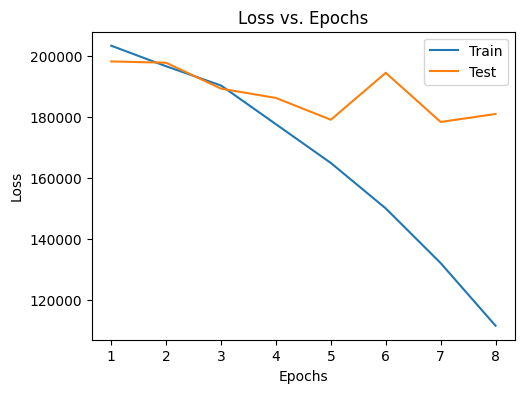

In [22]:
# Initialize loss function, optimizer, and learning rate scheduler
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store training and testing losses
train_losses = []
test_losses = []

# Load model if a checkpoint exists
try:
  checkpoint = torch.load("/content/drive/MyDrive/DataSets/model_checkpoint.pth")
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  train_losses = checkpoint['train_losses']
  test_losses = checkpoint['test_losses']
  start_epoch = checkpoint['epoch'] + 1
  print("Model found and loaded.")
except FileNotFoundError:
  print("No model was found.")
  start_epoch = 0

# Training loop
num_epochs = 8
for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(tqdm(train_loader), 0):
      inputs, labels = data
      inputs, labels = inputs.to(device), labels.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluate on test data
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
      for data in tqdm(test_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

    test_losses.append(test_loss / len(test_loader))

    print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}")

    # Save model, optimizer, and scheduler state after each epoch
    torch.save({
      'epoch': epoch,
      'model_state_dict': model.state_dict(),
      'optimizer_state_dict': optimizer.state_dict(),
      'train_losses': train_losses,
      'test_losses': test_losses,
    }, "/content/drive/MyDrive/DataSets/model_checkpoint.pth")

# Plotting the training and testing loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses[:8], label='Train')
plt.plot(range(1, num_epochs+1), test_losses[:8], label='Test')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



## Conclusion and Next Steps

**We are stopping the model training at this point.** As observed, the test loss continues to decrease, albeit not as rapidly as we would like, Whilst the training loss keeps rapidly decreasing. This might indicate that the model is overfiting to the data.

Despite that, this initial experiment with a basic CNN model has been **successful** for us. It's important to remember that the primary goal was not to train a fully sufficient model right away, but rather to **verify that the dataset contains enough information for a model to learn**. This experience has provided us with **valuable insights**.

### Key Takeaways:

1. **Dimensionality and Training Time**:  
   Due to the long training time and the high dimensionality of the dataset, we need to consider methods for **reducing data dimensionality** to speed up training.

2. **Data Input Process**:  
   The data input process could be improved. By making simple modifications to the data, we can **emphasize the features we want the model to focus on**. This will not only reduce the data's dimensionality but also **accelerate the model's learning rate**. Specifically, we anticipate a **significant drop in loss during the initial epochs**.

3. **Model Refinement**:  
   Our current model is simple, taking basic images and reducing their dimensionality through convolutions while attempting to capture the most important features. This approach can be **further refined**. Even without resorting to a very deep model—which would be computationally expensive at this stage—we can **fine-tune the model to better align with the most informative data**. This will allow us to reduce the number of convolutions while still **distilling the most crucial information before the linear regression head**.
























## Visualizing Model Performance

To better understand the performance of our simple CNN model, we will **visually compare the actual gaze points with the predicted gaze points**. This visual representation will be more intuitive and informative than just looking at loss metrics, which might not be easily interpretable.

### Methodology:

We will select a **few random samples from the dataset** and plot both the real and predicted gaze points on a **simulated computer screen**. The dimensions of this simulated screen will be **1920x1080 pixels**.

By doing this, we aim to provide a **human-readable evaluation** of how well our model is performing in terms of gaze prediction.


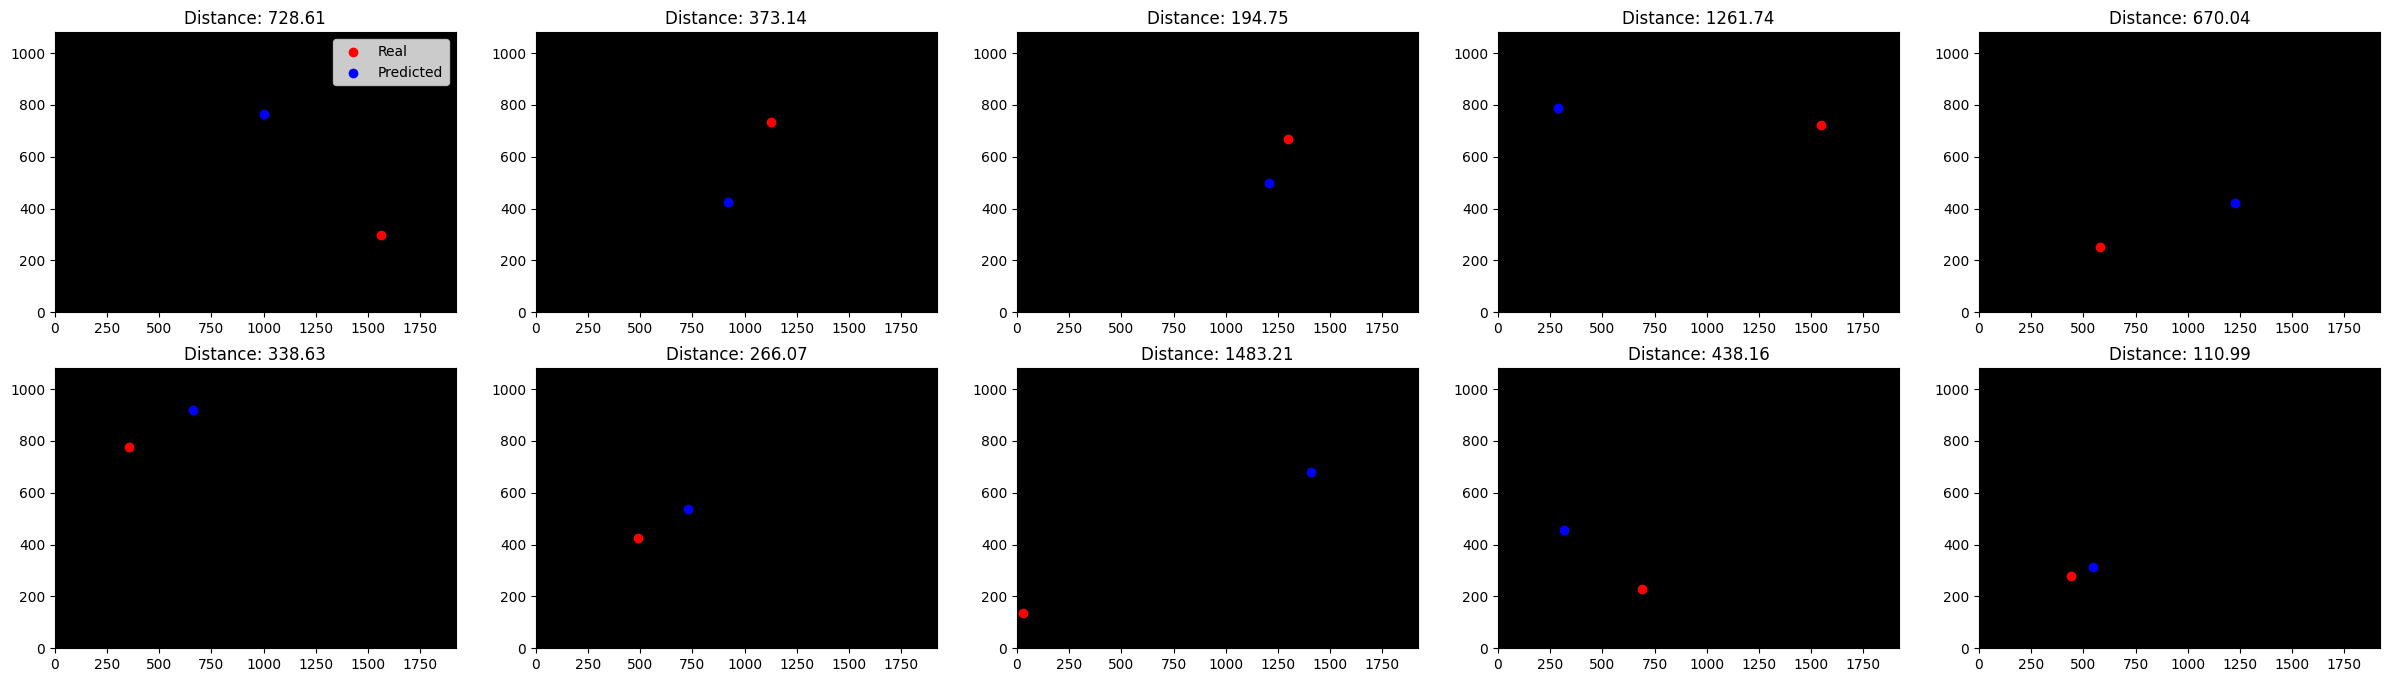

In [17]:
# Ensure the model is in evaluation mode
model.eval()

# Initialize the plot
fig, axes = plt.subplots(2, 5, figsize=(30, 8))
axes = axes.flatten()

# Configure plot appearance to simulate a screen
for ax in axes:
  ax.set_facecolor('black')
  ax.set_xlim([0, 1920])  # Set x-axis limits
  ax.set_ylim([0, 1080])  # Set y-axis limits


# Take 10 images from the test set
for i, (inputs, labels) in enumerate(test_loader):
  if i>=10: break
  # Move inputs and labels to the device where the model resides
  inputs, labels = inputs.to(device), labels.to(device)

  # Forward pass to get model outputs
  with torch.no_grad():
      outputs = model(inputs)

  # Convert outputs and labels to NumPy arrays
  outputs = outputs.cpu().numpy()
  labels = labels.cpu().numpy()

  # Calculate the distance between the real and predicted points (using euclidean distance)
  distance = np.sqrt(np.sum((labels[0] - outputs[0]) ** 2))

  # Plot the real and predicted coordinates
  ax = axes[i]
  ax.scatter(labels[0, 0], labels[0, 1], color='red', label='Real' if i == 0 else "")
  ax.scatter(outputs[0, 0], outputs[0, 1], color='blue', label='Predicted' if i == 0 else "")
  ax.set_title(f"Distance: {distance:.2f}")

# Add legend to the first subplot
axes[0].legend()

# Show the plot
plt.show()


---

**From the visualizations**, it is evident that the model has successfully identified certain image features that correlate with gaze direction. However, the **accuracy remains suboptimal**, and in some instances, the model's predictions deviate significantly. Despite these shortcomings, the model generally approximates the gaze direction, albeit with a considerable margin of error.

Our findings are **promising** in two key aspects: first, the problem at hand is **learnable**, and second, the images contain features that **correlate with gaze points**. Armed with this knowledge and an understanding of our **limitations**—particularly concerning **training time** and the need for **dimensionality reduction**—we can proceed to address these challenges.

### **Identified Problems and Proposed Solutions**

#### **Problem 1: Dimensionality and Data Preprocessing**  
Given the high dimensionality of the images and the sizable dataset, it is imperative to streamline the data fed into the model.  
**Solution:**  
Our **initial approach** to solving this problem will raise a discussion on exactly what information we want our model to focus on. To understand this better, consider the analogy of a laser pointer problem: where a laser pointer is aimed in a particular direction, the goal is to predict where the laser dot will appear when the device is activated. In this simplified thought experiment, elements such as the background or the shape of the laser pointer itself are inconsequential. What would truly matters is the actual exit point of the laser and its relative position in space.

Applying this principle to our gaze estimation challenge allows us to **refine the scope** of our problem. Instead of estimating the gaze from the complete image—which, for context, contains the face with the background removed—we can **narrow our focus** to two main features: the eyes and the facial location within the image. This approach aligns with the core elements that matter in the laser pointer analogy, thereby providing a more targeted and potentially effective method for gaze prediction.


#### **Problem 2: Hardware and Time Constraints**  
Given our limitations, we aim to experiment with various model architectures to identify the most efficient one.  
**Solution:**  
Utilizing deep pre-trained models as feature extractors could serve as a starting point for further training and optimization on our relativly thin model, thereby reducing **computational time** and enabling the use of more **complex models**.

####**Problem 3: Resolution**  
During our manual attempts to predict gaze direction, a realization emerged: perhaps the most crucial features for gaze estimation are condensed into a very small number of pixels—specifically, the eyes. It's possible that the image quality and resolution are far below what's needed for an effective gaze estimation model. This issue is well-known in the field and is a primary reason why infrared cameras are often employed in gaze estimation studies.

However, our objective is to develop a model that functions even with standard webcams. This necessitates exploring non-mechanical methods to enhance the eye region before feeding it into the model. Among the ideas considered are the use of filters to improve eye contrast, thereby aiding the model in capturing the direction in which the eyes are pointed. Additionally, we are contemplating the application of feature extraction techniques to the eye images themselves, aiming to capture variations in their shape as a feature of gaze direction. For instance, feature extractors like HOG (Histogram of Oriented Gradients) and SIFT are under consideration. These are just a few of the ideas that have been raised.

### **Next Steps**  
With the problems and potential solutions now clearly outlined, let's turn our attention to the first issue at hand: the presence of redundant information in our images. This not only increases computational time but may also impede the model's learning process. Several strategies have been considered to address this. Initially, we propose cropping the eye region from the original images and using the remaining features to encode the head's 3D position relative to the camera.

Even with this refined approach, several considerations arise. For instance, should the eyes be presented together in a single image to be processed by one Convolutional Neural Network (CNN), or should they be separated and each fed into distinct CNNs? This would allow for the extraction of gaze features that are invariant to the specific eye from which they originated. Another consideration involves the encoding of head position. While the initial idea was to simply pass the four corners of a bounding box around the face, this has evolved into a more sophisticated grid mapping representation. In this scheme, a grid of a predetermined size is generated for each image, and the head's relative location within the original image is inscribed onto this grid. This ensures that adequate information about both the position and relative size of the head is retained, which is also indicative of the depth dimension.

At this juncture, we have opted not to employ pretrained models as feature extractors. This decision is made to rigorously test our current hypothesis concerning the types of input information—specifically, the eyes and the encoded head location—that are most beneficial for our model. Similarly, we will refrain from any further data modifications at this stage. This is to isolate the impact of input changes on the model's evolution and performance. Should we observe a notable improvement in performance, we will then proceed to explore image enhancement techniques.

---
